In [2]:
"""
PART-01 資料處理 part, EGG 大綱
### EGG: import 模組 ###
### EGG read csv data ###
## EGG: 處理 data ###
### EGG: 資料合併 ###
## EGG: 資料輸出 ###

p.s. Data retrieved from Kaggle: WineQuality (https://www.kaggle.com/hufe09/winequality
"""

# platform: Jupyter Notebook (Anaconda3)
# Language: Python
# By. EGG. Huang.

### EGG: import 模組 ###
import pandas as pd 
import numpy as np 
import seaborn as sns #Seaborn是一種基於 matplotlib 的圖形 可視化 python libraty
import matplotlib as mpl
import matplotlib.pyplot as plt

### EGG read csv data ###
# EGG 記得把 要 read 的檔案 放到同一個資料夾裡面


red_wine_data = pd.read_csv('winequality-red.csv', sep = ';') 
# 注意後面 , sep = ';' → 可以讓 csv 的資料 (用; 分開的) 看得懂下面的 print out
white_wine_data = pd.read_csv('winequality-white.csv', sep = ';')


# red_wine_data.info() #基本資料
# white_wine_data.info() #基本資料

print(red_wine_data)
# → total 1599 筆 data, 12 個變數

### EGG: 處理 data ###
# Ref: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html

# 回 "duplicated"的傳布林值 → True =1
# 用.sum 把這些加起來就會知道有幾個重複
red_wine_data.duplicated().sum()
white_wine_data.duplicated().sum()

print ('red duplicate:', red_wine_data.duplicated().sum())
print ('white duplicate:', white_wine_data.duplicated().sum())

# 把 重複的刪掉 → drop
# Ref: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
red_wine_data.drop_duplicates (inplace = True)
white_wine_data.drop_duplicates (inplace = True)

print(red_wine_data.info())
# → red wine 從 total 1599 筆 data, 12 個變數 => 變成 1359 筆 data

# 檢查有沒有空的值
# Ref: https://pandas.pydata.org/docs/reference/api/pandas.isnull.html

print('red null:', red_wine_data.isnull().sum().sum())
print('white null:', white_wine_data.isnull().sum().sum()) 
#第一個 sum 把 "每一列" null 的()布林值回傳值加起來, 第二個再把這些每個列的加總值產生的 series再加起來 

### EGG: 資料合併 ###
print(red_wine_data.info()) #1359筆
print(white_wine_data.info()) #3961筆

# 合併, 有很多種方法, 連集（Concat）: 利用連集（Concat）上下相拼 (p.s.有時候會有索引重複的現象，請務必要修正)
wine_combination = pd.concat([red_wine_data, white_wine_data]).reset_index(drop=True) 
print(wine_combination)
# index 索引重複的做修正
# total = 1359 + 3961 = 5320, 12 變數

### EGG: 資料輸出 ###
# 可以輸出成很多
# 輸出成 Excel
wine_combination.to_excel ('wine_combination.xlsx', sheet_name = 'combination')

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [3]:
"""
PART-02 視覺化分析 Data

"""
### EGG: import 模組 ###
import pandas as pd 
import numpy as np 
import seaborn as sns #Seaborn是一種基於 matplotlib 的圖形 可視化 python libraty
import matplotlib as mpl
import matplotlib.pyplot as plt


# 讀取 data
wine_data = pd.read_excel ('wine_combination.xlsx', sheet_name = 'combination')
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5320 entries, 0 to 5319
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            5320 non-null   int64  
 1   fixed acidity         5320 non-null   float64
 2   volatile acidity      5320 non-null   float64
 3   citric acid           5320 non-null   float64
 4   residual sugar        5320 non-null   float64
 5   chlorides             5320 non-null   float64
 6   free sulfur dioxide   5320 non-null   float64
 7   total sulfur dioxide  5320 non-null   float64
 8   density               5320 non-null   float64
 9   pH                    5320 non-null   float64
 10  sulphates             5320 non-null   float64
 11  alcohol               5320 non-null   float64
 12  quality               5320 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 540.4 KB


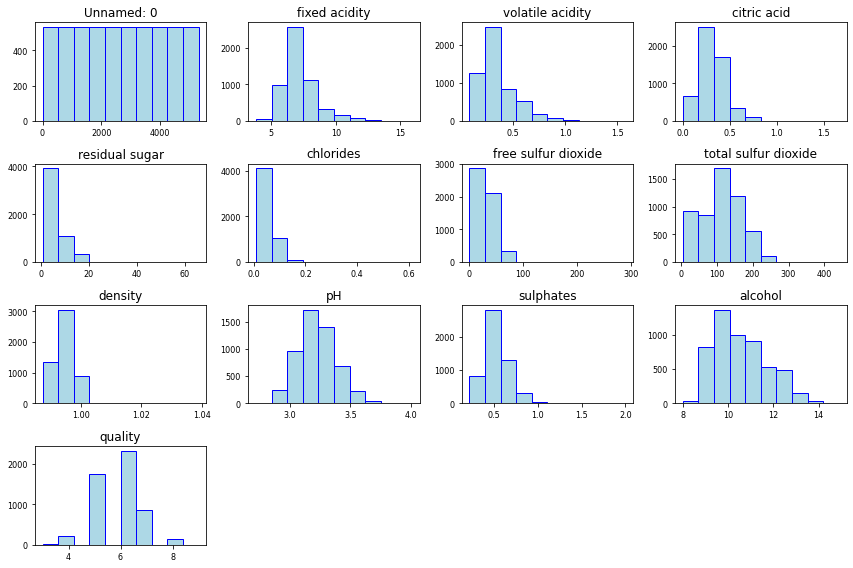

In [4]:
# 直方圖
wine_data.hist(color='lightblue',edgecolor='blue',linewidth=1.0,xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(1,1,3,3))

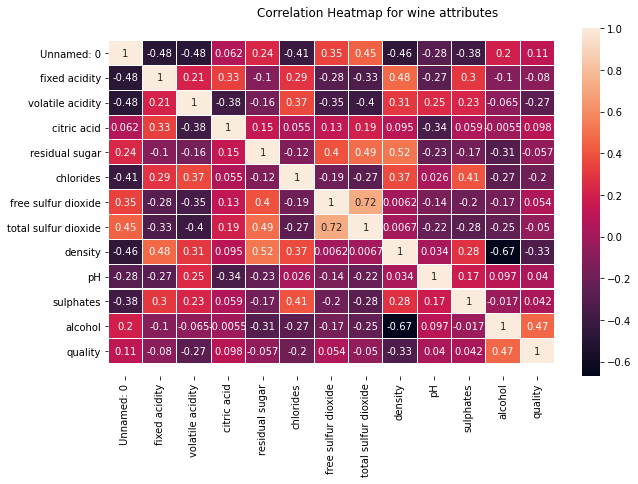

In [6]:
# 熱力圖
f, ax = plt.subplots(figsize=(10, 6))
b = sns.heatmap(wine_data.corr(), annot=True, linewidths=.05, ax=ax)
f.subplots_adjust(top=0.93)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
title= f.suptitle('Correlation Heatmap for wine attributes', fontsize=12)


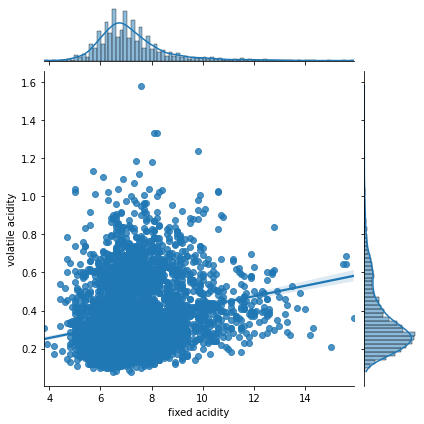

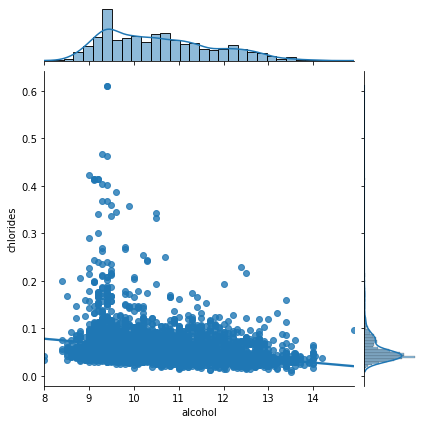

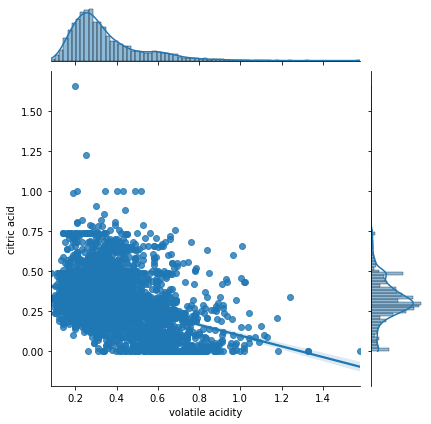

In [8]:
#聯合圖

#圖1
sns.jointplot(data=wine_data, x="fixed acidity", y="volatile acidity", kind = 'reg')

#圖2
sns.jointplot(data=wine_data, x="alcohol", y="chlorides", kind = 'reg')

#圖3
sns.jointplot(data=wine_data, x="volatile acidity", y="citric acid", kind = 'reg')

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

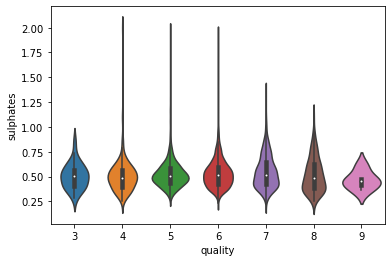

In [9]:
# 小提琴圖
sns.violinplot(data=wine_combination, x="quality", y="sulphates")